In [389]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,LassoCV,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,PowerTransformer,label_binarize
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV,cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve,auc, RocCurveDisplay,recall_score,roc_auc_score,davies_bouldin_score,f1_score,precision_recall_curve,ConfusionMatrixDisplay,average_precision_score
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest,RandomForestRegressor,VotingClassifier
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
import streamlit as st
import joblib
import warnings
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
import plotly.express as px
from sklearn.utils import resample
from sklearn.inspection import permutation_importance
import os
from xgboost import XGBClassifier
import time
warnings.filterwarnings('ignore')

In [391]:
df=pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [392]:
df.shape

(581012, 55)

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [394]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [396]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [399]:
df.duplicated().sum()

0

In [400]:
df.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [403]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [404]:
df["Euclidean_Distance_To_Hydrology"] = np.sqrt(
    df["Horizontal_Distance_To_Hydrology"]**2 + df["Vertical_Distance_To_Hydrology"]**2
)

In [405]:
plt.style.use('ggplot')

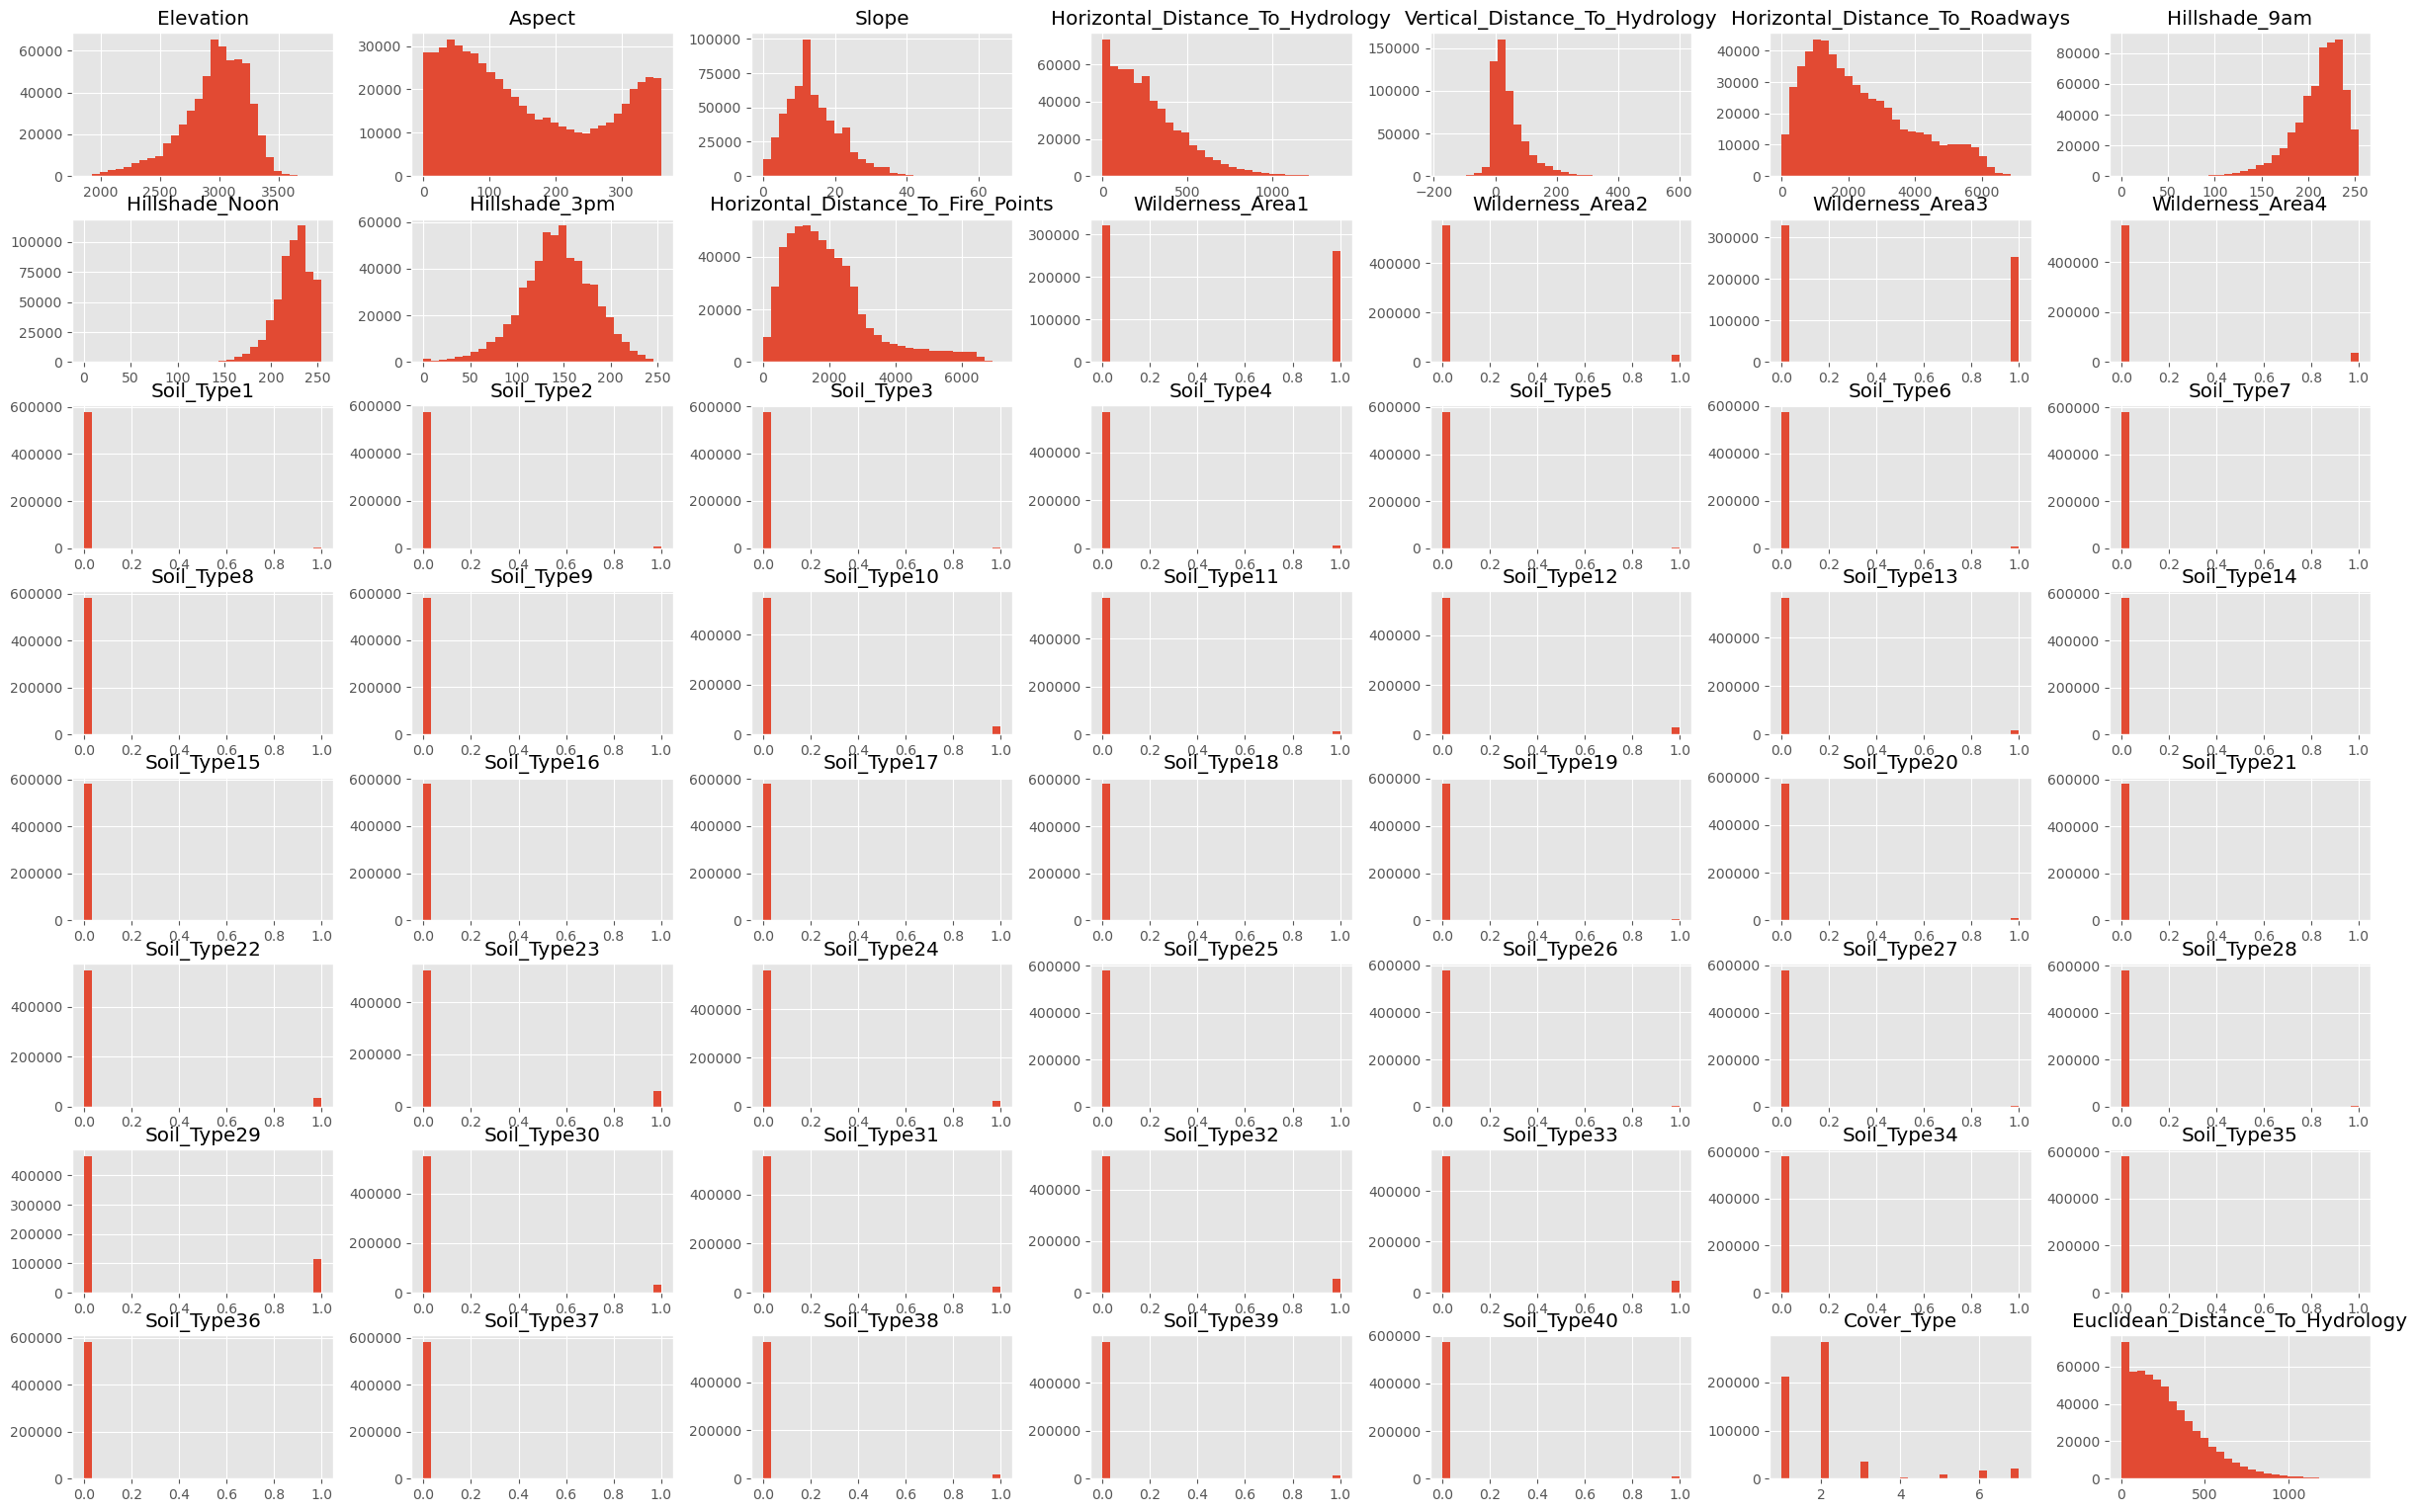

In [407]:
df.hist(bins=30,figsize=(30,19))
plt.show()

In [412]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

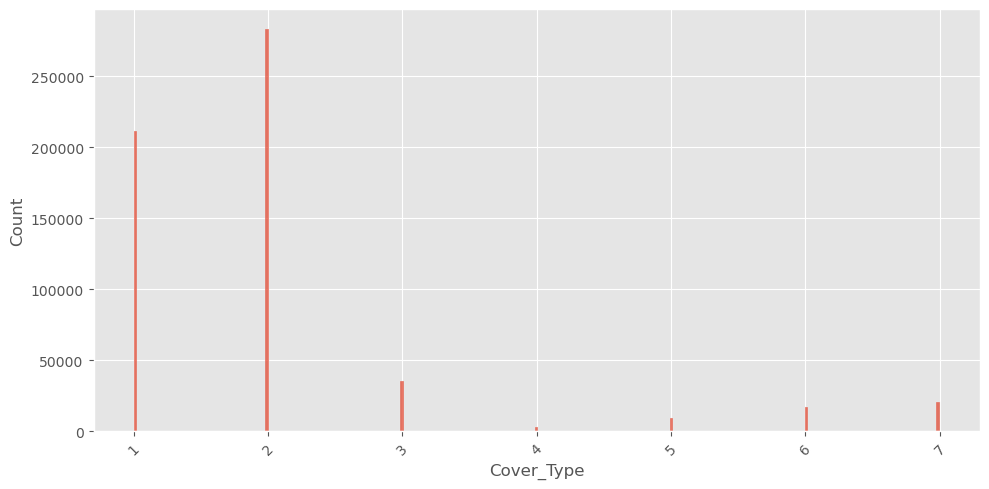

In [413]:
plt.figure(figsize=(10,5))
sns.histplot(x='Cover_Type',data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [414]:
non_encoded_cols=df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Euclidean_Distance_To_Hydrology','Cover_Type']]

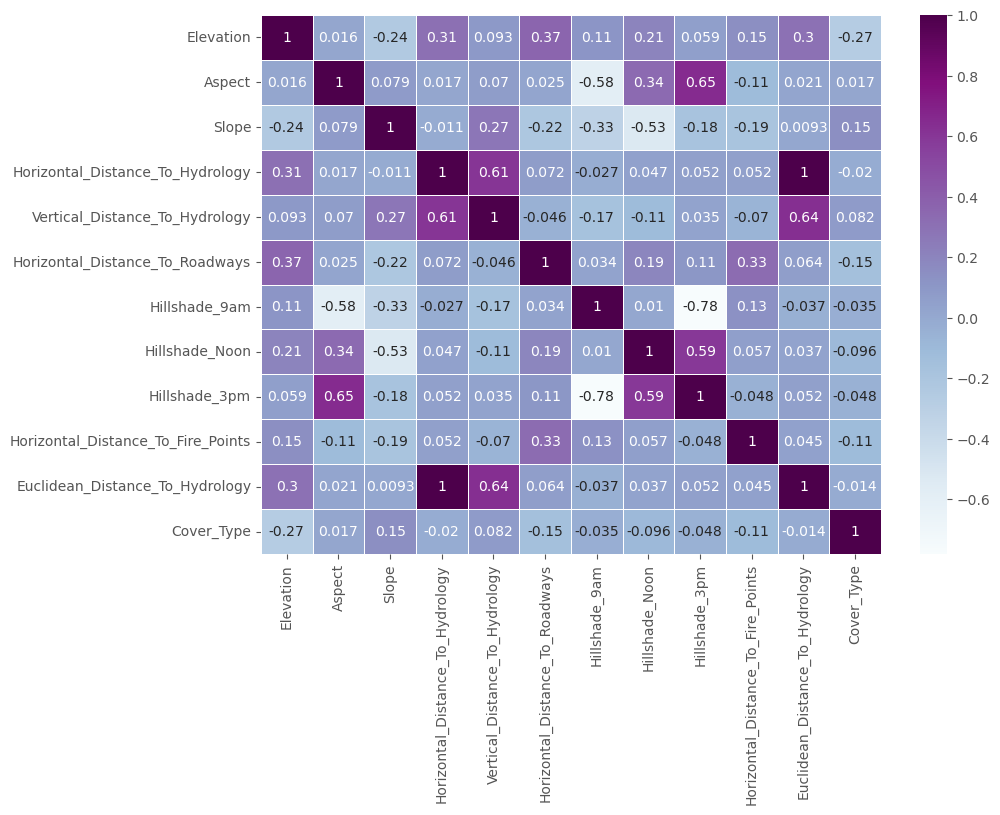

In [415]:
plt.figure(figsize=(10,7))
sns.heatmap(non_encoded_cols.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()

In [416]:
df['Cover_Type'].value_counts(normalize=True)

Cover_Type
2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: proportion, dtype: float64

In [417]:
const_cols=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
df[const_cols].skew().sort_values(ascending=False)

Vertical_Distance_To_Hydrology        1.790250
Horizontal_Distance_To_Fire_Points    1.288644
Horizontal_Distance_To_Hydrology      1.140437
Slope                                 0.789273
Horizontal_Distance_To_Roadways       0.713679
Aspect                                0.402628
Hillshade_3pm                        -0.277053
Elevation                            -0.817596
Hillshade_Noon                       -1.063056
Hillshade_9am                        -1.181147
dtype: float64

In [418]:
def cap_outliers(df,cols):
    df_capped=df.copy()
    for col in cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        df_capped[col]=np.clip(df[col],lower,upper)
    return df_capped
df_capped=cap_outliers(df,const_cols)
df_capped

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Euclidean_Distance_To_Hydrology
0,2596,51,3.0,258,0,510,221.0,232,148.0,4839,...,0,0,0,0,0,0,0,0,5,258.000000
1,2590,56,2.0,212,-6,390,220.0,235,151.0,4839,...,0,0,0,0,0,0,0,0,5,212.084889
2,2804,139,9.0,268,65,3180,234.0,238,135.0,4839,...,0,0,0,0,0,0,0,0,2,275.769832
3,2785,155,18.0,242,118,3090,238.0,238,122.0,4839,...,0,0,0,0,0,0,0,0,2,269.235956
4,2595,45,2.0,153,-1,391,220.0,234,150.0,4839,...,0,0,0,0,0,0,0,0,5,153.003268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20.0,85,17,108,240.0,237,118.0,837,...,0,0,0,0,0,0,0,0,3,86.683332
581008,2391,152,19.0,67,12,95,240.0,237,119.0,845,...,0,0,0,0,0,0,0,0,3,68.066144
581009,2386,159,17.0,60,7,90,236.0,241,130.0,854,...,0,0,0,0,0,0,0,0,3,60.406953
581010,2384,170,15.0,60,5,90,230.0,245,143.0,864,...,0,0,0,0,0,0,0,0,3,60.207973


In [419]:
skewness=df_capped[const_cols].skew().sort_values(ascending=False)
skewed_features=skewness[skewness>1].index
skewed_cols = [
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points',
    'Euclidean_Distance_To_Hydrology'
]

print("Before Yeo-Johnson:")
print(df_capped[skewed_cols].skew())

pt=PowerTransformer(method='yeo-johnson')
df_capped[skewed_cols]=pt.fit_transform(df_capped[skewed_cols])

print("\nAfter Yeo-Johnson:")
print(df_capped[skewed_cols].skew())

Before Yeo-Johnson:
Slope                                 0.571735
Horizontal_Distance_To_Hydrology      0.850074
Vertical_Distance_To_Hydrology        0.904680
Horizontal_Distance_To_Roadways       0.711945
Horizontal_Distance_To_Fire_Points    0.878567
Euclidean_Distance_To_Hydrology       1.133469
dtype: float64

After Yeo-Johnson:
Slope                                -0.033319
Horizontal_Distance_To_Hydrology     -0.141196
Vertical_Distance_To_Hydrology        0.103265
Horizontal_Distance_To_Roadways      -0.071051
Horizontal_Distance_To_Fire_Points   -0.029301
Euclidean_Distance_To_Hydrology      -0.107095
dtype: float64


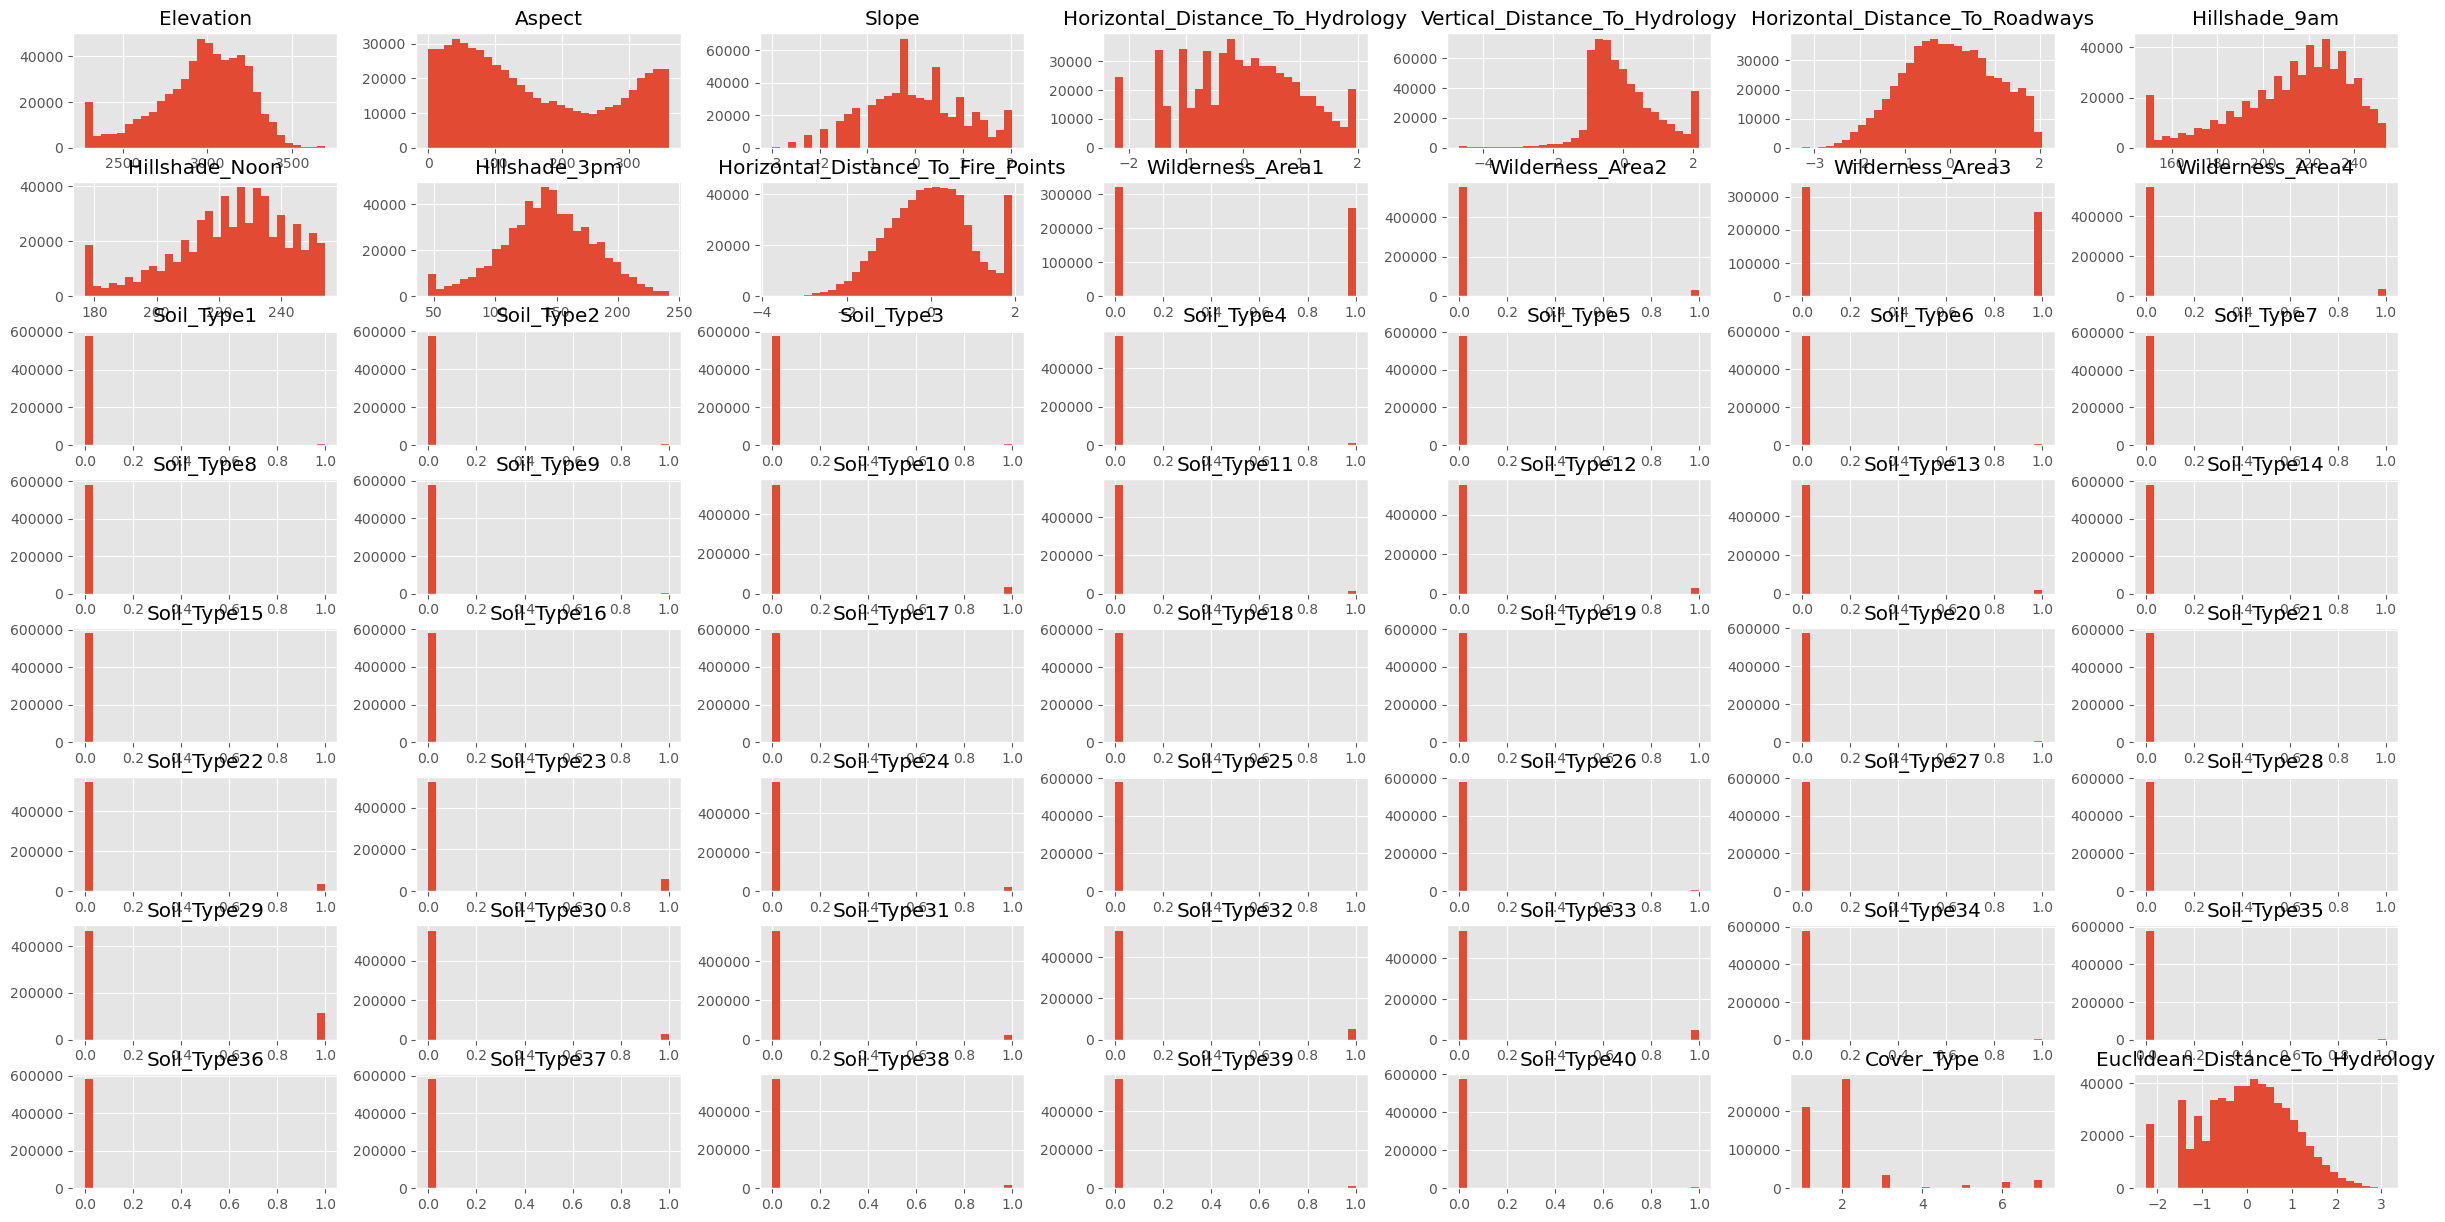

In [420]:
df_capped.hist(bins=30,figsize=(30,15))
plt.show()

In [421]:
scaler=StandardScaler()
df_capped[['Elevation','Aspect','Hillshade_9am','Hillshade_Noon','Hillshade_3pm']]=scaler.fit_transform(df_capped[['Elevation','Aspect','Hillshade_9am','Hillshade_Noon','Hillshade_3pm']])
df_capped

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Euclidean_Distance_To_Hydrology
0,-1.359202,-0.935157,-1.877676,0.190599,-0.848354,-1.434030,0.331484,0.447817,0.139474,1.925469,...,0,0,0,0,0,0,0,0,5,0.158938
1,-1.381436,-0.890480,-2.173475,-0.034644,-1.055028,-1.634268,0.291499,0.610168,0.219370,1.925469,...,0,0,0,0,0,0,0,0,5,-0.058484
2,-0.588450,-0.148836,-0.621013,0.236619,0.485910,0.673239,0.851290,0.772519,-0.206743,1.925469,...,0,0,0,0,0,0,0,0,2,0.237225
3,-0.658855,-0.005869,0.640757,0.114917,1.422491,0.627154,1.011230,0.772519,-0.552960,1.925469,...,0,0,0,0,0,0,0,0,2,0.208777
4,-1.362908,-0.988770,-2.173475,-0.366516,-0.879421,-1.632455,0.291499,0.556051,0.192738,1.925469,...,0,0,0,0,0,0,0,0,5,-0.381410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.100310,-0.023740,0.873874,-0.851836,-0.448683,-2.347107,1.091201,0.718402,-0.659489,-0.935350,...,0,0,0,0,0,0,0,0,3,-0.843056
581008,-2.118838,-0.032675,0.758869,-1.013660,-0.557082,-2.400362,1.091201,0.718402,-0.632857,-0.924368,...,0,0,0,0,0,0,0,0,3,-1.006732
581009,-2.137366,0.029873,0.519283,-1.082829,-0.670530,-2.422009,0.931260,0.934870,-0.339904,-0.912091,...,0,0,0,0,0,0,0,0,3,-1.081247
581010,-2.144777,0.128163,0.265042,-1.082829,-0.718040,-2.422009,0.691350,1.151338,0.006313,-0.898543,...,0,0,0,0,0,0,0,0,3,-1.083250


In [422]:
x_lin=df_capped.drop(columns=['Cover_Type'],axis=1)
y_lin=df_capped['Cover_Type']
x_tree=df.drop(columns=['Cover_Type'],axis=1)
y_tree=df['Cover_Type']

In [423]:
x_train_lin,x_test_lin,y_train_lin,y_test_lin=train_test_split(x_lin,y_lin,test_size=0.2,stratify=y_lin,random_state=42)
x_train_tree,x_test_tree,y_train_tree,y_test_tree=train_test_split(x_tree,y_tree,test_size=0.2,stratify=y_tree,random_state=42)

In [424]:
lr_model=LogisticRegression()
lr_model.fit(x_train_lin,y_train_lin)
y_pred_lr=lr_model.predict(x_test_lin)
print(f'Baseline Logistic Regression Accuracy: {accuracy_score(y_test_lin,y_pred_lr)}')

Baseline Logistic Regression Accuracy: 0.7223651712950613


In [425]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train_tree,y_train_tree)
y_pred_rf=rf_model.predict(x_test_tree)
print(f"Baseline Random Forest Accuracy: {accuracy_score(y_test_tree,y_pred_rf)}")

Baseline Random Forest Accuracy: 0.9551130349474626


In [ ]:
gb_model=GradientBoostingClassifier()
gb_model.fit(x_train_tree,y_train_tree)
y_pred_gb=gb_model.predict(x_test_tree)
print(f"Baseline Gradient Boosting Accuracy: {accuracy_score(y_test_tree,y_pred_gb)}")

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", n_estimators=300, random_state=42)
}

results = {}
y_tree_xgb = y_tree - 1
y_train_tree_xgb = y_train_tree - 1
y_test_tree_xgb = y_test_tree - 1
for name, model in models.items():
    start = time.time()
    if name == 'Logistic Regression':
        model.fit(x_train_lin, y_train_lin)  # Use scaled data for LR, original is fine for trees
        y_pred = model.predict(x_test_lin)
        acc = accuracy_score(y_test_lin, y_pred)
        duration = time.time() - start
        report=classification_report(y_test_lin,y_pred)
    elif name == 'XGBoost':
        model.fit(x_train_tree, y_train_tree_xgb)
        y_pred = model.predict(x_test_tree)
        acc = accuracy_score(y_test_tree_xgb, y_pred)
        report=classification_report(y_test_tree_xgb,y_pred)
        duration=time.time()-start
    else:
        model.fit(x_train_tree,y_train_tree)
        y_pred=model.predict(x_test_tree)
        acc=accuracy_score(y_test_tree,y_pred)
        duration=time.time()-start
        report=classification_report(y_test_tree,y_pred)
    
    results[name] = {
        "Accuracy": acc,
        "Time (s)": duration
    }
    
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training + Prediction time: {duration:.2f} sec")
    print("Classification Report:")
    print(report)


In [ ]:

models_and_grids = {
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "GradientBoosting": (
        XGBClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1, 0.2],
         'max_depth': [3, 5]}
    ),

    "LogisticRegression": (
        LogisticRegression(max_iter=1000, random_state=42),
        {'C': [0.1, 1, 10],
         'penalty': ['l2'],
         'class_weight': [None, 'balanced']}
    )
}

results = {}
for name, (model, param_grid) in models_and_grids.items():
    print(f"\n🔍 Training {name}...")
    if name in ["SVM", "LogisticRegression"]:
        Xtr, Xte = x_train_lin,x_test_lin
    else:
        Xtr, Xte = x_train_tree,x_test_tree
    start=time.time()
    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
    if name in ["SVM", "LogisticRegression"]:
        grid.fit(Xtr, y_train_lin)
    elif name== 'GradientBoosting':
        grid.fit(x_train_tree,y_train_tree_xgb)
    else:
        grid.fit(Xtr,y_train_tree)
    y_pred = grid.best_estimator_.predict(Xte)

    print(f"✅ Best {name}: {grid.best_params_}")
    if name in ["SVM", "LogisticRegression"]:
        duration=time.time()-start
        print(f"Training + Prediction Time : {duration}")
        print(classification_report(y_test_lin, y_pred, digits=3))
        results[name] = (grid.best_params_, classification_report(y_test_lin, y_pred, digits=3, output_dict=True))
    elif name== 'GradientBoosting':
        duration=time.time()-start
        print(f"Training + Prediction Time : {duration}")
        print(classification_report(y_test_tree_xgb, y_pred, digits=3))
        results[name] = (grid.best_params_, classification_report(y_test_tree_xgb, y_pred, digits=3, output_dict=True))
    else:
        print(classification_report(y_test_tree, y_pred, digits=3))
        results[name] = (grid.best_params_, classification_report(y_test_tree, y_pred, digits=3, output_dict=True))


In [ ]:
rf_model=RandomForestClassifier(class_weight='balanced',min_samples_split=2,n_estimators=100)
rf_model.fit(x_train_tree,y_train_tree)
y_pred_rf=rf_model.predict(x_test_tree)
y_proba_rf = rf_model.predict_proba(x_test_tree)
print(f"Tuned Random Forest Accuracy:\n {classification_report(y_test_tree,y_pred_rf)}")

In [ ]:
cm=confusion_matrix(y_test_tree,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)
fig,ax=plt.subplots(figsize=(15,7))
disp.plot(cmap=plt.cm.Reds,ax=ax,values_format='d')
plt.title('Random Forest - Confusion Matrix',fontsize=14)
plt.savefig("conf_matrix_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
feature_names=x_train_tree.columns
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_importance)

plt.figure(figsize=(10,15))
plt.barh(rf_importance['Feature'], rf_importance['Importance'], color='orange')
plt.title("Random Forest Feature Importance")
plt.savefig("feature_importance_random_forest.png", dpi=300, bbox_inches="tight")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print("ROC-AUC:", roc_auc_score(y_test_tree, y_proba_rf,multi_class='ovr',average='macro'))

n_classes = len(np.unique(y_test_tree))
y_test_bin = label_binarize(y_test_tree, classes=np.arange(n_classes))

# Predict probabilities
y_proba_rf = rf_model.predict_proba(x_test_tree)

# Plot ROC curve for each class
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Random chance line
plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (Random Forest)")
plt.legend()
plt.savefig("roc_curve_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

cv_scores=cross_val_score(rf_model,x_tree,y_tree,cv=cv,scoring='accuracy',n_jobs=-1)
print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

In [ ]:
n_classes = len(np.unique(y_test_tree))
y_test_bin = label_binarize(y_test_tree, classes=np.arange(1, n_classes+1))

# Probabilities from model
y_proba_rf = rf_model.predict_proba(x_test_tree)

plt.figure(figsize=(8,6))

# For each class
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba_rf[:, i])
    avg_prec = average_precision_score(y_test_bin[:, i], y_proba_rf[:, i])
    plt.plot(recall, precision, label=f"Class {i+1} (AP = {avg_prec:.2f})")

# Baseline (positive class ratio)
baseline = np.mean(y_test_bin)
plt.hlines(y=baseline, xmin=0, xmax=1, colors='k', linestyles='--', label="Baseline")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves (Random Forest)")
plt.legend(loc="lower left")
plt.savefig("AP_curve_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
rf_model.fit(x_train_tree,y_train_tree)

joblib.dump(rf_model,'random_forest_model.pkl')
x_tree.to_csv('tree_model_csv.csv')

print("✅ All models saved successfully!")

loaded_rf_model=joblib.load('random_forest_model.pkl')
y_pred_rf_loaded=loaded_rf_model.predict(x_test_tree)
print(f"Random Forest (Loaded) test Accuracy: {(y_pred_loaded == y_test_lin).mean()}")